In [ ]:
# Acessando arquivos do Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Configurando imagens da classe de capacetes de dataset disponibilizado no Kaggle

In [ ]:
import zipfile
zip_object = zipfile.ZipFile(file='/content/gdrive/MyDrive/Projeto TCC/approach_2/images/helmet_dataset_ap2.zip',
                             mode='r')
zip_object.extractall("./dataset/")
zip_object.close()

In [ ]:
!mkdir -p dataset/labels/

In [ ]:
# Movendo pasta para um diretoria acima
!mv /content/dataset/Safety\ Helmet\ Wearing\ Dataset/Annotations /content/dataset
!mv /content/dataset/Safety\ Helmet\ Wearing\ Dataset/Images /content/dataset

In [ ]:
# Renomenado as pastas
!mv /content/dataset/Annotations /content/dataset/annotations
!mv /content/dataset/Images /content/dataset/images

In [ ]:
!cp /content/gdrive/MyDrive/Projeto\ TCC/approach_2/scripts/converter_annotations.py ./

In [ ]:
!python converter_annotations.py

A saída de streaming foi truncada nas últimas 5000 linhas.
./dataset/annotations/hard_hat_workers1750.xml : helmet
./dataset/annotations/hard_hat_workers1750.xml : helmet
./dataset/annotations/hard_hat_workers1750.xml : helmet
./dataset/annotations/hard_hat_workers1750.xml : helmet
./dataset/annotations/hard_hat_workers1750.xml : helmet
./dataset/annotations/hard_hat_workers1750.xml : helmet
./dataset/annotations/hard_hat_workers1750.xml : helmet
./dataset/annotations/hard_hat_workers1750.xml : helmet
./dataset/annotations/hard_hat_workers1750.xml : helmet
./dataset/annotations/hard_hat_workers1750.xml : helmet
./dataset/annotations/hard_hat_workers1750.xml : helmet
./dataset/annotations/hard_hat_workers1750.xml : helmet
./dataset/annotations/hard_hat_workers1750.xml : helmet
./dataset/annotations/hard_hat_workers1750.xml : helmet
./dataset/annotations/hard_hat_workers1750.xml : head_with_helmet
./dataset/annotations/hard_hat_workers1750.xml : head_with_helmet
./dataset/annotations/har

Fazendo divisão dos arquivos de treinamento e teste

In [ ]:
import os
from sklearn.model_selection import train_test_split
image_list = os.listdir('dataset/images')
train_list, test_list = train_test_split(image_list, test_size=0.2, random_state=42)
print('total =',len(image_list))
print('train :',len(train_list))
print('test  :',len(test_list))

total = 5000
train : 4000
test  : 1000


In [ ]:
from pathlib import Path
from shutil import copyfile
def copy_data(file_list, img_labels_root, imgs_source, mode):

    root_file = Path( 'dataset/'+  mode)
    if not root_file.exists():
        print(f"Path {root_file} does not exit")
        os.makedirs(root_file)

    for file in file_list:               
        img_name = file.replace('.png', '')        
        img_src_file = imgs_source + '/' + img_name + '.png'        
        label_src_file = img_labels_root + '/' + img_name + '.txt'

        #print(img_sor_file)
        #print(label_sor_file)
        # im = Image.open(rf"{img_sor_file}")
        # im.show()

        # Copy image
        DICT_DIR = 'dataset/'  + mode
        img_dict_file = DICT_DIR + '/' + img_name + '.png'

        copyfile(img_src_file, img_dict_file)

        # Copy label
        #DICT_DIR = 'dataset/labels/' + mode
        img_dict_file = DICT_DIR + '/' + img_name + '.txt'
        copyfile(label_src_file, img_dict_file)

In [ ]:
copy_data(train_list, 'dataset/labels', 'dataset/images', "train")
copy_data(test_list,  'dataset/labels', 'dataset/images', "test")

Path dataset/train does not exit
Path dataset/test does not exit


Compactando o Dataset e enviando para o drive

In [ ]:
cd dataset/

/content/dataset


In [ ]:
!zip -r ../train.zip ./train/

A saída de streaming foi truncada nas últimas 5000 linhas.
  adding: train/hard_hat_workers4617.txt (deflated 55%)
  adding: train/hard_hat_workers614.png (deflated 0%)
  adding: train/hard_hat_workers1573.png (deflated 0%)
  adding: train/hard_hat_workers3846.png (deflated 0%)
  adding: train/hard_hat_workers1407.png (deflated 0%)
  adding: train/hard_hat_workers382.png (deflated 0%)
  adding: train/hard_hat_workers758.png (deflated 0%)
  adding: train/hard_hat_workers2725.png (deflated 0%)
  adding: train/hard_hat_workers4837.txt (deflated 28%)
  adding: train/hard_hat_workers2512.txt (deflated 50%)
  adding: train/hard_hat_workers3541.txt (deflated 40%)
  adding: train/hard_hat_workers2506.png (deflated 0%)
  adding: train/hard_hat_workers3749.png (deflated 0%)
  adding: train/hard_hat_workers3117.png (deflated 0%)
  adding: train/hard_hat_workers806.png (deflated 0%)
  adding: train/hard_hat_workers1385.png (deflated 0%)
  adding: train/hard_hat_workers902.png (deflated 0%)
  addin

In [ ]:
!zip -r ../test.zip ./test/

  adding: test/ (stored 0%)
  adding: test/hard_hat_workers4124.txt (deflated 54%)
  adding: test/hard_hat_workers450.png (deflated 0%)
  adding: test/hard_hat_workers3548.png (deflated 0%)
  adding: test/hard_hat_workers4118.png (deflated 0%)
  adding: test/hard_hat_workers574.png (deflated 0%)
  adding: test/hard_hat_workers1258.png (deflated 0%)
  adding: test/hard_hat_workers1574.png (deflated 0%)
  adding: test/hard_hat_workers1100.png (deflated 0%)
  adding: test/hard_hat_workers1915.txt (deflated 51%)
  adding: test/hard_hat_workers591.png (deflated 0%)
  adding: test/hard_hat_workers11.txt (deflated 28%)
  adding: test/hard_hat_workers626.txt (deflated 41%)
  adding: test/hard_hat_workers1660.png (deflated 0%)
  adding: test/hard_hat_workers4498.txt (deflated 43%)
  adding: test/hard_hat_workers3736.png (deflated 0%)
  adding: test/hard_hat_workers1132.txt (deflated 56%)
  adding: test/hard_hat_workers4538.png (deflated 0%)
  adding: test/hard_hat_workers2609.txt (deflated 28%)

In [ ]:
cd ..

/content


In [ ]:
!cp ./train.zip /content/gdrive/MyDrive/Projeto\ TCC/approach_2/data/
!cp ./test.zip /content/gdrive/MyDrive/Projeto\ TCC/approach_2/data/

# Gerando arquivos txt

In [ ]:
pwd

'/content'

In [ ]:
import os
def gerar_txt(dir_path, mode):
  # o que o codigo abaixo faz: adiciona o nome e caminho de todos as fotos (.jpg) em um txt
  imagens = []
  os.chdir(os.path.join("dataset", mode))
  for filename in os.listdir(os.getcwd()):
    if filename.endswith(".png") or filename.endswith(".jpg"):
      imagens.append(os.path.join(dir_path, mode, filename))
  os.chdir("..")

  txt_file = mode + '.txt'
  with open(txt_file, "a") as outfile:
    for img in imagens:
      outfile.write(img)
      outfile.write("\n")
    outfile.close()
  os.chdir("..")

In [ ]:
gerar_txt('data', 'test')
gerar_txt('data', 'train')

In [ ]:
!cp dataset/train.txt /content/gdrive/MyDrive/Projeto\ TCC/approach_2/data/
!cp dataset/test.txt /content/gdrive/MyDrive/Projeto\ TCC/approach_2/data/

In [ ]:
print("Finalmente configurado!!!!")

In [ ]:
!unzip /content/gdrive/MyDrive/Projeto\ TCC/approach_2/data/train.zip -d ./
!unzip /content/gdrive/MyDrive/Projeto\ TCC/approach_2/data/test.zip -d ./

A saída de streaming foi truncada nas últimas 5000 linhas.
  inflating: ./train/hard_hat_workers3916.txt  
  inflating: ./train/hard_hat_workers3656.png  
  inflating: ./train/hard_hat_workers4782.txt  
  inflating: ./train/hard_hat_workers620.png  
  inflating: ./train/hard_hat_workers2669.txt  
  inflating: ./train/hard_hat_workers1993.png  
  inflating: ./train/hard_hat_workers4379.txt  
  inflating: ./train/hard_hat_workers4365.txt  
  inflating: ./train/hard_hat_workers4597.txt  
  inflating: ./train/hard_hat_workers3006.txt  
  inflating: ./train/hard_hat_workers178.txt  
  inflating: ./train/hard_hat_workers1196.txt  
  inflating: ./train/hard_hat_workers4065.png  
  inflating: ./train/hard_hat_workers2349.txt  
  inflating: ./train/hard_hat_workers736.png  
  inflating: ./train/hard_hat_workers4834.txt  
  inflating: ./train/hard_hat_workers2079.txt  
  inflating: ./train/hard_hat_workers975.png  
  inflating: ./train/hard_hat_workers1164.png  
  inflating: ./train/hard_hat_wor

In [ ]:
import os
def contar_labels(dir, count):
  files = os.listdir(dir)
  for filename in files:
    if filename.endswith(".txt"):
      with open(dir + filename, 'r') as file:
        for line in file:
          class_number = int(line.split()[0])
          count[class_number]+=1


In [ ]:
count_test = [0 , 0]
contar_labels('./test/', count_test)
count_train = [0 , 0]
contar_labels('./train/', count_train)
print(count_test)
print(count_train)

[2835, 1052]
[11932, 4196]


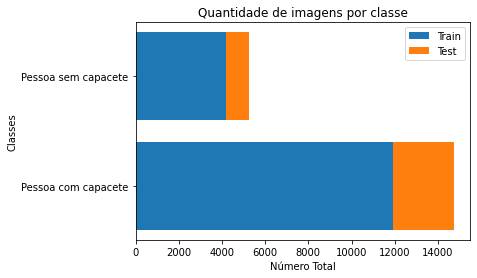

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

classes = ['Pessoa com capacete', 'Pessoa sem capacete']

fig, ax = plt.subplots()

p1 = ax.barh(classes, count_train, label='Train', align='center')
p2 = ax.barh(classes, count_test, left=count_train, label='Test')

ax.set_title('Quantidade de imagens por classe')
ax.set_ylabel('Classes')
ax.set_xlabel('Número Total')
ax.legend()


plt.show()